# Part rate estimation

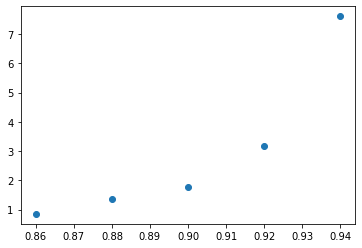

In [87]:
x = np.array(eth_7_twin_win_parameters_amer['Lower Barrier'])
y = np.array(eth_7_twin_win_parameters_amer['Participation Rate'])
plt.scatter(x, y, marker = 'o')

In [89]:
x_list = list(x)
x_list.reverse()
y_list = list(y)
y_list.reverse()

In [61]:
x_list

[0.86, 0.88, 0.9, 0.92, 0.94]

In [100]:
x_val_copy = x_val.copy()

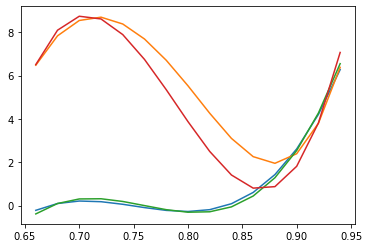

In [107]:
from scipy.interpolate import UnivariateSpline
for k in (1,2,3,4):  # line parabola cubicspline
    globals()['extrapolator_'+str(k)] = UnivariateSpline( x_list, y_list, k=k )
#     y = globals()['extrapolator_'+str(k)]( x_val )
#     plt.plot( x_val, y)  # pylab


    #new code
    ny = globals()['extrapolator_'+str(k)](x_val_copy).clip(0,max(y_list))
    globals()['extrapolator_'+str(k)+'_2'] = UnivariateSpline(x_val_copy, ny)
    y = globals()['extrapolator_'+str(k)+'_2']( x_val )
    plt.plot( x_val, y)  # pylab
#     spl = UnivariateSpline(x, y)
#     xs = np.linspace(0,len(y)-1, 1000)
#     spl.set_smoothing_factor(2)
#     ny = spl(xs).clip(0,max(spl(x)))
#     spl2 = UnivariateSpline(xs, ny)

In [112]:
x_val, y, extrapolator_4_2(x_val)

([0.94,
  0.9199999999999999,
  0.8999999999999999,
  0.8799999999999999,
  0.86,
  0.84,
  0.82,
  0.7999999999999999,
  0.7799999999999999,
  0.76,
  0.74,
  0.72,
  0.7,
  0.6799999999999999,
  0.6599999999999999],
 array([7.06989038, 3.81321479, 1.8126167 , 0.87455523, 0.80548947,
        1.41187851, 2.50018146, 3.87685742, 5.35180547, 6.74868459,
        7.89459377, 8.61663198, 8.74189818, 8.09749136, 6.51051048]),
 array([7.06989038, 3.81321479, 1.8126167 , 0.87455523, 0.80548947,
        1.41187851, 2.50018146, 3.87685742, 5.35180547, 6.74868459,
        7.89459377, 8.61663198, 8.74189818, 8.09749136, 6.51051048]))

In [93]:
from scipy.interpolate import pchip
pch = pchip(x_list, y_list)

In [96]:
x_list, y_list, x_val, pch(x_val)

([0.86, 0.88, 0.9, 0.92, 0.94],
 [0.85,
  1.34615384615385,
  1.78571428571429,
  3.18181818181818,
  7.60869565217391],
 [0.94,
  0.9199999999999999,
  0.8999999999999999,
  0.8799999999999999,
  0.86,
  0.84,
  0.82,
  0.7999999999999999,
  0.7799999999999999,
  0.76,
  0.74,
  0.72,
  0.7,
  0.6799999999999999,
  0.6599999999999999],
 array([ 7.60869565,  3.18181818,  1.78571429,  1.34615385,  0.85      ,
         0.3006756 , -0.29155079, -0.9164106 , -1.56363528, -2.22295626,
        -2.88410497, -3.53681286, -4.17081137, -4.77583192, -5.34160596]))

In [57]:
from scipy import interpolate

x_val = [0.94-i for i in np.arange(0, 0.3, 0.02)]

tck = interpolate.splrep(list(x), list(y), k = 3, s = 1/2)
y_int = interpolate.splev(x_val, tck, der = 0)
# for deg in [3]:
#     poly = np.polyfit(list(x), list(y), deg=deg)
#     y_int  = np.polyval(poly, x_val)
plt.scatter(x, y, marker = 'o', color = 'black')
plt.plot(x_val, y_int, marker = 'o')
plt.legend()

ValueError: Error on input data

In [30]:
dim(x)

NameError: name 'dim' is not defined

In [18]:
len(np.arange(0, 0.2, 0.02))

10

In [80]:
convert_to_pcg(was_breached_calc_given_barriers(data_7days_eth_2021,0.98,1.02, 'eur')).iloc[-1]

[0.98, 1.02]    88.462%
[0.96, 1.04]    80.769%
[0.94, 1.06]    63.462%
[0.92, 1.08]    51.923%
[0.9, 1.1]      48.077%
Name: pcg_of_breaches, dtype: object

In [113]:
for i in np.arange(0, 0.25, 0.02):
    print(convert_to_pcg(was_breached_calc_given_barriers(data_7days_eth_2021,1-i,1+i, 'american')).iloc[-1])

[1.0, 1.0]    100.0%
Name: pcg_of_breaches, dtype: object
[0.98, 1.02]    100.0%
Name: pcg_of_breaches, dtype: object
[0.96, 1.04]    100.0%
Name: pcg_of_breaches, dtype: object
[0.94, 1.06]    92.308%
Name: pcg_of_breaches, dtype: object
[0.92, 1.08]    78.846%
Name: pcg_of_breaches, dtype: object
[0.9, 1.1]    65.385%
Name: pcg_of_breaches, dtype: object
[0.88, 1.12]    59.615%
Name: pcg_of_breaches, dtype: object
[0.86, 1.1400000000000001]    44.231%
Name: pcg_of_breaches, dtype: object
[0.84, 1.16]    36.538%
Name: pcg_of_breaches, dtype: object
[0.8200000000000001, 1.18]    30.769%
Name: pcg_of_breaches, dtype: object
[0.8, 1.2]    19.231%
Name: pcg_of_breaches, dtype: object
[0.78, 1.22]    15.385%
Name: pcg_of_breaches, dtype: object
[0.76, 1.24]    13.462%
Name: pcg_of_breaches, dtype: object


In [120]:
eth_7_twin_win_parameters_amer.loc[13] = [0, 0.84, 1.16, 0.005, 0.7, 0, 0]
eth_7_twin_win_parameters_amer.loc[14] = [0, 0.80, 1.2, 0.005, 0.5, 0, 0]
eth_7_twin_win_parameters_amer.loc[15] = [0, 0.75, 1.25, 0.005, 0.3, 0, 0]
eth_7_twin_win_parameters_amer

<ipython-input-120-1526a4ce2ed3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_7_twin_win_parameters_amer.loc[13] = [0, 0.84, 1.16, 0.005, 0.7, 0, 0]
<ipython-input-120-1526a4ce2ed3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_7_twin_win_parameters_amer.loc[14] = [0, 0.80, 1.2, 0.005, 0.5, 0, 0]
<ipython-input-120-1526a4ce2ed3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_7_twin_win_parameters_amer.loc[15] = [0,

,eth,Lower Barrier,Upper Barrier,Base Coupon,Participation Rate,Bonus Coupon,Max APR
8,Twin Win,0.94,1.06,0.005,7.608696,0.456522,0.461522
9,NaN,0.92,1.08,0.005,3.181818,0.254545,0.259545
10,NaN,0.9,1.1,0.005,1.785714,0.178571,0.183571
11,NaN,0.88,1.12,0.005,1.346154,0.161538,0.166538
12,NaN,0.86,1.14,0.005,0.85,0.085,0.09
13,0.0,0.84,1.16,0.005,0.7,0.0,0.0
14,0.0,0.8,1.2,0.005,0.5,0.0,0.0
15,0.0,0.75,1.25,0.005,0.3,0.0,0.0


In [14]:
eth_7_twin_win_parameters_eur

,eth,Lower Barrier,Upper Barrier,Base Coupon,Participation Rate,Bonus Coupon,Max APR
8,Twin Win,0.98,1.02,0.005,13,0.26,0.265
9,NaN,0.96,1.04,0.005,3.75,0.15,0.155
10,NaN,0.94,1.06,0.005,1.9,0.114,0.119
11,NaN,0.92,1.08,0.005,1.35,0.108,0.113
12,NaN,0.9,1.1,0.005,0.85,0.085,0.09


In [76]:
convert_to_pcg(breaches_pcg_american(data_7days_eth_2021,eth_7_twin_win_parameters_amer)).iloc[-1]
# breaches_pcg_american(data_7days_eth_2021,eth_7_twin_win_parameters_amer)['[0.86, 1.14]']

[0.94, 1.06]    49.176%
[0.92, 1.08]    37.363%
[0.9, 1.1]      28.571%
[0.88, 1.12]    23.901%
[0.86, 1.14]    16.758%
Name: pcg_of_breaches, dtype: object

# Part rate estimation (options calc)

## Functions

## Parameters

In [6]:
rang = 0.1
upper_pcg = 1 + rang
down_pcg = 1 - rang
S = data_7days_eth_2021[0]['close'][0]
U = S * upper_pcg
L = S * down_pcg
T = 1
r_f=0.08/52
sigma=data_7days_eth_2021[0]['close'].pct_change().std()
r = np.mean(data_7days_eth_2021[0]['close'].pct_change())

In [51]:
data_7days_eth_2022

[              close
 timestamp          
 2022-01-01  3766.05
 2022-01-02  3829.44
 2022-01-03  3765.57
 2022-01-04  3784.39
 2022-01-05  3539.63
 2022-01-06  3406.55
 2022-01-07  3197.44,
               close
 timestamp          
 2022-01-08  3080.63
 2022-01-09  3151.69
 2022-01-10  3082.42
 2022-01-11  3240.72
 2022-01-12  3372.96
 2022-01-13  3241.86
 2022-01-14  3308.87,
               close
 timestamp          
 2022-01-15  3327.75
 2022-01-16  3348.00
 2022-01-17  3210.26
 2022-01-18  3160.87
 2022-01-19  3085.12
 2022-01-20  3002.03
 2022-01-21  2568.12,
               close
 timestamp          
 2022-01-22  2411.50
 2022-01-23  2539.63
 2022-01-24  2440.37
 2022-01-25  2459.99
 2022-01-26  2464.61
 2022-01-27  2424.72
 2022-01-28  2545.93,
               close
 timestamp          
 2022-01-29  2602.17
 2022-01-30  2602.54
 2022-01-31  2688.27
 2022-02-01  2788.93
 2022-02-02  2681.48
 2022-02-03  2697.17
 2022-02-04  2996.30,
               close
 timestamp          
 2022-02

## Barrier

### Up and Out

### a. Assumptions

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import math as m
# import random as rand

# # #Market information
# risk_free = 0.04
# sigma = week['close'].pct_change().std()
# #share specific information
# S_0 = week['close'][0]

# dT=1/52

# #European up and out call option information
# T = 1
# barrier = week['close'][0]*upper_pcg
# strike = week['close'][0]*down_pcg

### b. Defining the functions

In [1]:
def terminal_shareprice(S_0, risk_free_rate, sigma, Z, T):
    """
    Generates the terminal share price given some random normal values, z
    """
    # It returns an array of terminal stock prices.
    return S_0*np.exp((risk_free_rate-sigma**2/2)*T+sigma*np.sqrt(T)*Z)

def discounted_call_payoff(S_T, K, risk_free_rate, T):
    """
    Function for evaluating the discounted payoff of a call option
    in the Monte Carlo Estimation
    """
    # It returns an array which has the value of the call for each terminal stock price.
    # HERE IS IMPLIED THAT WE ARE INVESTING 1 ETH --> PREMIUM = S_0
    return np.exp(-risk_free_rate*T)*np.maximum(S_T - K, 0)

### c. Simulating Paths

In [9]:
np.random.seed(0)
num_simulations = 1000
# the number of steps represent the times we simulate the process, with each step comprising
# 1000*i steps so we get simulations from 1000 to 50000
num_steps = 50
num_of_weeks = 53
# terminal price is an array of size 13 to account for the 12 months plus initial value
# it is timed by the number of steps
term_val = [[None]*num_of_weeks]*num_steps 

# initialise the monte carlo value, estimates and std as empty array of size number of steps
mbarrier_val = [None]*num_steps
mbarrier_estimates = [None]*num_steps
mbarrier_std = [None]*num_steps

### d. Monte Carlo Simulation

In [4]:
def get_barrier_price(S_0, strike_num, upper_barrier, 
                      risk_free,  sigma,
                      T, dT, 
                      num_step, num_simulations, num_of_weeks):
    # terminal price is an array of size 13 to account for the 12 months plus initial value
    # it is timed by the number of steps
    term_val = [[None]*num_of_weeks]*num_steps 

    # initialise the monte carlo value, estimates and std as empty array of size number of steps
    mbarrier_val = [None]*num_steps
    mbarrier_estimates = [None]*num_steps
    mbarrier_std = [None]*num_steps
    current_time=0
    for i in range(1,num_steps+1):
        # fill out the first value with our initial stock price
        term_val[i-1][0] = np.full((num_simulations*i), S_0)

        for j in range (1,num_of_weeks):
            # update current week to reflect the weekly simulation we are currently in
#             current_week = (j-1)/(num_of_weeks-1)
            norm_array = norm.rvs(size = num_simulations*i)
            term_val[i-1][j] = terminal_shareprice(term_val[i-1][j-1],risk_free,sigma,norm_array,dT)

        # Compute discounted barrier Price of the option 
        mbarrier_val[i-1] = discounted_call_payoff(term_val[i-1][(num_of_weeks-1)],strike_num,risk_free,T-current_time)

        # use the above formula to calculate the values of the barrier option
        ## get array of booleans for when stock is knocked out or not
        knock_out_array = (np.max(term_val[i-1],axis = 0) < upper_barrier)
        ## times it by the value of the previously calculated barrier option
        mbarrier_val[i-1] = mbarrier_val[i-1] * knock_out_array

        # compute mean and standard deviation of entire path
        mbarrier_estimates[i-1] = np.mean(mbarrier_val[i-1])
        mbarrier_std[i-1] = np.std(mbarrier_val[i-1]/np.sqrt(i*num_simulations))

    return np.mean(mbarrier_estimates)

In [11]:
def get_double_barrier_price(S_0, strike_num, upper_barrier, lower_barrier,
                      risk_free,  sigma,
                      T, dT, 
                      num_step, num_simulations, num_of_periods):
    # terminal price is an array of size 13 to account for the 12 months plus initial value
    # it is timed by the number of steps
    term_val = [[None]*num_of_periods]*num_steps 

    # initialise the monte carlo value, estimates and std as empty array of size number of steps
    mbarrier_val = [None]*num_steps
    mbarrier_estimates = [None]*num_steps
    mbarrier_std = [None]*num_steps
    current_time=0
    for i in range(1,num_steps+1):
        # fill out the first value with our initial stock price
        term_val[i-1][0] = np.full((num_simulations*i), S_0)

        for j in range (1,num_of_periods):
            # update current week to reflect the weekly simulation we are currently in
            current_time = (j-1)/(num_of_periods-1)
            norm_array = norm.rvs(size = num_simulations*i)
            term_val[i-1][j] = terminal_shareprice(term_val[i-1][j-1],risk_free,sigma,norm_array,dT)
#             print(term_val[i-1][j])

        # Compute discounted barrier Price of the option 
        mbarrier_val[i-1] = discounted_call_payoff(term_val[i-1][(num_of_periods-1)],strike_num,risk_free,T-current_time)
#         print(mbarrier_val[i-1])
        # use the above formula to calculate the values of the barrier option
        ## get array of booleans for when stock is knocked out or not
        knock_out_array = (np.max(term_val[i-1],axis = 0) < upper_barrier) & ((np.min(term_val[i-1],axis = 0) > lower_barrier))
#         print(sum(knock_out_array))
        ## times it by the value of the previously calculated barrier option
        mbarrier_val[i-1] = mbarrier_val[i-1] * knock_out_array
#         print(np.mean(mbarrier_val[i-1]))
#         print('####################################')
        # compute mean and standard deviation of entire path
        mbarrier_estimates[i-1] = np.mean(mbarrier_val[i-1])
        mbarrier_std[i-1] = np.std(mbarrier_val[i-1]/np.sqrt(i*num_simulations))
#     print(np.mean(mbarrier_estimates))
    return np.mean(mbarrier_estimates)#, term_val, mbarrier_val

In [39]:
# A = S
S = 1
dT=1/7
T = 1
# np.random.seed(0)
num_step=50
num_simulations = 1000
num_of_periods=8
for range_ in [2,4,6,8,10]:    
#     range_ = 2
    upper_pcg, down_pcg = 1+range_/100, 1-range_/100
    # up_and_out_price = get_barrier_price(S, S*down_pcg, S*upper_pcg, 
    #                       r_f, sigma,
    #                       T, dT, 
    #                       num_step, num_simulations, num_of_weeks)
#     double_barrier_price, term_val, mbarrier_val = get_double_barrier_price(S, S, S*upper_pcg, S*down_pcg,
#                           r, sigma,
#                           T, dT, 
#                           num_step, num_simulations, num_of_periods)
    # print(S*upper_pcg, S*down_pcg)
#     print('Knock out call price: ', double_barrier_price)
#     # print('Percentage of S_0: ', double_barrier_price/S)
#     # print('Yield used for buying opt: ', S*0.0255)
#     print('Participation rate: ', (S*0.0255)/double_barrier_price)
    print('Part rate for ' + str(range_) + '% range: '+str(0.0255/get_double_barrier_price(S, S, S*upper_pcg, S*down_pcg,
                          r, sigma,
                          T, dT, 
                          num_step, num_simulations, num_of_periods)))

Part rate for 2% range: 14.96629207546681
Part rate for 4% range: 0.5430722469487463
Part rate for 6% range: 0.15646163039274472
Part rate for 8% range: 0.0860529166492865
Part rate for 10% range: 0.06078450949513349


In [188]:
import numpy as sp 
from scipy import log,exp,sqrt,stats 
#
def bsCall(S,X,T,r,sigma):
    d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T)) 
    d2 = d1-sigma*sqrt(T)
    return S*stats.norm.cdf(d1)-X*exp(-r*T)*stats.norm.cdf(d2)
#
def up_and_out_call(s0,x,T,r,sigma,n_simulation,barrier):
    n_steps=100. 
    dt=T/n_steps 
    total=0 
    for j in sp.arange(0, n_simulation): 
        sT=s0 
        out=False
        for i in range(0,int(n_steps)): 
            e=np.random.normal() 
            sT*=sp.exp((r-0.5*sigma*sigma)*dt+sigma*e*sp.sqrt(dt)) 
            if sT>barrier: 
               out=True 
        if out==False: 
            total+=bsCall(s0,x,T,r,sigma) 
    return total/n_simulation 

In [262]:
s0=S              # today stock price 
x=S               # exercise price 
barrier=32          # barrier level 
T=6./12.            # maturity in years 
r=0.05              # risk-free rate 
sigma=0.2           # volatility (annualized) 
n_simulation=100    # number of simulations 
sp.random.seed(12)  # fix a seed
#
result=up_and_out_call(s0,x,T,r,sigma,n_simulation,barrier) 
print('up-and-out-call = ', round(result,3))

up-and-out-call =  0.069


<ipython-input-188-6f355dc2f273>:5: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
<ipython-input-188-6f355dc2f273>:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
<ipython-input-188-6f355dc2f273>:6: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d2 = d1-sigma*sqrt(T)
<ipython-input-188-6f355dc2f273>:7: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return S*stats.norm.cdf(d1)-X*exp(-r*T)*stats.norm.cdf(d2)


In [129]:
r_f*52/365, sigma

(0.00021917808219178083, 0.08837581820872283)

In [89]:
discounted_call_payoff(term_val[1][(num_of_periods-1)],S,r_f,T-0)

array([ 5.8328807 , 56.31291892, 35.06847141, ..., 16.77923609,
       43.27851167,  0.        ])

In [75]:
term_val[0]

[array([730.92, 730.92, 730.92, ..., 730.92, 730.92, 730.92]),
 array([760.34136387, 747.42701712, 698.2936636 , ..., 735.65529042,
        722.80054285, 729.85419072]),
 array([774.22230654, 730.01095313, 719.65195459, ..., 735.05746635,
        697.80053992, 750.72077772]),
 array([759.34984372, 748.56505504, 737.47517696, ..., 722.15512306,
        685.13132308, 762.04568727]),
 array([747.62232863, 757.92777407, 685.6598524 , ..., 732.88783266,
        654.6445074 , 751.87480367]),
 array([730.20223967, 760.45265122, 639.43143757, ..., 722.12831927,
        658.5972276 , 756.84793816]),
 array([718.46312249, 780.89642396, 612.08874641, ..., 726.10978221,
        682.89754893, 765.14029071]),
 array([737.43470582, 786.22079168, 617.17207127, ..., 734.47117578,
        709.31090506, 708.75639283])]

### 2

In [14]:
# from https://kannansi.medium.com/how-to-price-barrier-option-using-quantlib-python-ee4b1fff2448
# Barrier Option: Up-and-Out Call 
# Strike 100, Barrier 150, Rebate 50, Exercise date 4 years 
import QuantLib as ql
from QuantLib import *
#Set up the global evaluation date to today
today = ql.Date(23, 1,2023)
Settings.instance().evaluationDate = today

# Specify option
upper_pcg=1.1
down_pcg = 0.9
for pcg_ in [2,4,6,8,10]:
    upper_pcg = 1+pcg_/100
    down_pcg = 1-pcg_/100
    option = BarrierOption(Barrier.UpOut, S*upper_pcg, 0, 
                           PlainVanillaPayoff(Option.Call, S*down_pcg), 
                           EuropeanExercise(Date(1, 2, 2023)))

    # We will now pass the market data: spot price : 100, risk-free rate: 1% and sigma: 30% 
    # Underlying Price
    u = SimpleQuote(S)
    # Risk-free Rate
    r_ = SimpleQuote(r_f)
    # Sigma 
    sigma_ = SimpleQuote(sigma)

    # Build flat curves and volatility
    riskFreeCurve = FlatForward(0, TARGET(), QuoteHandle(r_), Actual360())
    volatility = BlackConstantVol(0, TARGET(), QuoteHandle(sigma_), Actual360())

    # Model and Pricing Engine
    # Build the pricing engine by encapsulating the market data in a Black-Scholes process

    # Stochastic Process
    process = BlackScholesProcess(QuoteHandle(u), 
                                  YieldTermStructureHandle(riskFreeCurve), 
                                  BlackVolTermStructureHandle(volatility))

    # Build the engine (based on an analytic formula) and set it to the option for evaluation
#     option.setPricingEngine(AnalyticBarrierEngine(process))
#     option.setPricingEngine(AnalyticBinaryBarrierEngine(process))
    option.setPricingEngine(AnalyticDoubleBarrierBinaryEngine(process))
    
    # Market Data Changes
    # Change the market data to get new option pricing. 

    # Set initial value and define h
    u0 = u.value(); h=0.01
    P0 = option.NPV()

    # Bump up the price by h
    u.setValue(u0+h)
    P_plus = option.NPV()

    # Bump down the price by h
    u.setValue(u0-h)
    P_minus = option.NPV() 

    # Set the price back to its current value
    u.setValue(u0)

    # Calculate Greeks: Delta, Gamma, Vega, Theta, Rho
    delta = (P_plus - P_minus)/(2*h)
    gamma = (P_plus - 2*P0 + P_minus)/(h*h)

    # Update quote for rho calculation
    r0 = r_.value(); h1 = 0.0001
    r_.setValue(r0+h); P_plus = option.NPV()
    r_.setValue(r0)

    # Rho
    rho = (P_plus - P0)/h1

    # Update quote for sigma calculation
    sigma0 = sigma_.value() ; h = 0.0001
    sigma_.setValue(sigma0+h) ; P_plus = option.NPV()
    sigma_.setValue(sigma0)

    # Vega
    vega = (P_plus - P0)/h

    # Update quote to calculate theta
    Settings.instance().evaluationDate = today+7
    P1 = option.NPV()
    h = 1.0/365

    # Theta
    theta = (P1-P0)/h
    
    print(S/P1)

RuntimeError: wrong argument type

In [134]:
S/P0, S/P1, upper_pcg, S

(9.997308457212341, 10.000000000000004, 1.1, 0.9266)

## Binary option

### 1

In [15]:
# from https://quant.stackexchange.com/questions/57780/issue-in-pricing-binary-options-using-heaviside-function-and-quantlib-python
import QuantLib as ql

today = ql.Date().todaysDate()
initialValue = S
riskFreeTS = ql.YieldTermStructureHandle(ql.FlatForward(today, r_f, ql.Actual365Fixed()))
dividendTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0, ql.Actual365Fixed()))
volatility = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, ql.NullCalendar(), sigma, ql.Actual365Fixed()))

process = ql.BlackScholesMertonProcess(ql.QuoteHandle(ql.SimpleQuote(initialValue)), riskFreeTS, dividendTS, volatility)
steps = 1
rng = "pseudorandom" # could use "lowdiscrepancy"
numPaths = 500000
option_type = ql.Option.Put
strike_price = S*upper_pcg

# option_type = ql.Option.Call
# strike_price = S*down_pcg

maturity_date = today+ ql.Period(7, ql.Days)#ql.Date(30, 1, 2023)
exercise = ql.EuropeanExercise(maturity_date)

payoff_cash = ql.CashOrNothingPayoff(option_type, strike_price, 1)
binary_option_cash = ql.VanillaOption(payoff_cash, exercise)

payoff_asset = ql.AssetOrNothingPayoff(option_type, strike_price)
binary_option_asset = ql.VanillaOption(payoff_asset, exercise)

payoff_vanilla=ql.PlainVanillaPayoff(option_type, strike_price)
binary_option_vanilla = ql.VanillaOption(payoff_vanilla, exercise)

engine = ql.MCEuropeanEngine(process, rng, steps, requiredSamples=numPaths)

In [16]:
def binary(S, strike_price, upper_barrier, 
                      risk_free, sigma, style):
    today = ql.Date().todaysDate()
    initialValue = S
    riskFreeTS = ql.YieldTermStructureHandle(ql.FlatForward(today, risk_free, ql.Actual365Fixed()))
    dividendTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0, ql.Actual365Fixed()))
    volatility = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, ql.NullCalendar(), sigma, ql.Actual365Fixed()))

    process = ql.BlackScholesMertonProcess(ql.QuoteHandle(ql.SimpleQuote(initialValue)), riskFreeTS, dividendTS, volatility)
    steps = 1
    rng = "pseudorandom" # could use "lowdiscrepancy"
    numPaths = 10000
    if style == 'put':        
        option_type = ql.Option.Put
    elif style == 'call':
        option_type = ql.Option.Call
    strike_price = strike_price

    # option_type = ql.Option.Call
    # strike_price = S*down_pcg

    maturity_date = today+ ql.Period(7, ql.Days)#ql.Date(30, 1, 2023)
    exercise = ql.EuropeanExercise(maturity_date)

    payoff_vanilla=ql.PlainVanillaPayoff(option_type, strike_price)
    binary_option_vanilla = ql.VanillaOption(payoff_vanilla, exercise)

    engine = ql.MCEuropeanEngine(process, rng, steps, requiredSamples=numPaths)
    binary_option_vanilla.setPricingEngine(engine)
    price = binary_option_vanilla.NPV()
    return price

In [17]:
binary_option_vanilla.setPricingEngine(engine)
price = binary_option_vanilla.NPV()
print("Monte Carlo Price: {}".format(price))
engine = ql.AnalyticEuropeanEngine(process)
binary_option_cash.setPricingEngine(engine)
binary_option_asset.setPricingEngine(engine)
print("CashOrNothing: {}".format(binary_option_cash.NPV()))
# print("CashOrNothing * S: {}".format(binary_option_cash.NPV()*S))
print("AssetOrNothing: {}".format(binary_option_asset.NPV()))

Monte Carlo Price: 0.02031220451955596
CashOrNothing: 0.9480848062220435
AssetOrNothing: 0.9467432861471982


In [237]:
S,binary(S, S*upper_pcg, S*down_pcg, 
                      r_f, sigma, 'put')
# binary(S, S*down_pcg, S*upper_pcg, 
#                       r_f, sigma, 'call')

(100, 2.3869438184225977)

In [236]:
upper_pcg, down_pcg

(1.1, 0.9)

### 2

In [18]:
# from https://www.codearmo.com/python-tutorial/binary-options-and-implied-distributions
def monte_carlo_binary(S, strike, barrier, T, r, r_f, sigma, Q, 
                       type_='call', Ndraws=10_000, seed=0):
    np.random.seed(seed)
    dS = np.random.normal((r-sigma**2/2)*T, sigma*np.sqrt(T),size=Ndraws)
    ST = S *np.exp(dS) 
    if type_ =='call':
#         value = 0
#         for i in ST:
#             if i<barrier:
# #                 print(i)
#                 value += max(i-strike,0)
        return np.exp(-r_f*T) * len(ST[ (barrier>ST) & (ST>strike)])/Ndraws
#         return len(ST[ST>strike])/Ndraws * Q *np.exp(-r_f*T)
    elif type_ == 'put':
        return np.exp(-r_f*T) * len(ST[ (strike>ST) & (ST>barrier)])/Ndraws
#         return len(ST[ST<K])/Ndraws * Q *np.exp(-r_f*T)
    else:
        raise ValueError('Type must be put or call')

In [19]:
len(ST[ (S*upper_pcg>ST) & (ST> S*down_pcg)])/Ndraws

NameError: name 'ST' is not defined

In [62]:
# monte_carlo_binary(S, S*down_pcg, S*upper_pcg,T, r, r_f, sigma, 1, 'call')
sigma = 0.61/30
r = -0.01/30
0.0255/monte_carlo_binary(S, S*1.04, S*0.96,7, r, r_f, sigma, 1, 'put')#+0.0255/monte_carlo_binary(S, S*0.96, S*1.04, r, r_f, sigma, 1, 'call')

0.04707963361700404

In [242]:
upper_pcg

1.1

 ## Double Barrier

In [26]:
T = 1
r_f=0.08/52
sigma=data_7days_eth_2021[0]['close'].pct_change().std()
r = np.mean(data_7days_eth_2021[0]['close'].pct_change())

0.375597227387072

In [27]:
for week in data_7days_eth_2022:
    print(week.pct_change().std())

close    0.033952
dtype: float64
close    0.035544
dtype: float64
close    0.053069
dtype: float64
close    0.036396
dtype: float64
close    0.050235
dtype: float64
close    0.039042
dtype: float64
close    0.055287
dtype: float64
close    0.041585
dtype: float64
close    0.069366
dtype: float64
close    0.042601
dtype: float64
close    0.028345
dtype: float64
close    0.022143
dtype: float64
close    0.031627
dtype: float64
close    0.034763
dtype: float64
close    0.03636
dtype: float64
close    0.02078
dtype: float64
close    0.039172
dtype: float64
close    0.044855
dtype: float64
close    0.069192
dtype: float64
close    0.058426
dtype: float64
close    0.038191
dtype: float64
close    0.057749
dtype: float64
close    0.03346
dtype: float64
close    0.079626
dtype: float64
close    0.073716
dtype: float64
close    0.01512
dtype: float64
close    0.037304
dtype: float64
close    0.062579
dtype: float64
close    0.080366
dtype: float64
close    0.074637
dtype: float64
close    0.038

## Double Knock Out options

In [52]:
# from https://www.codearmo.com/python-tutorial/binary-options-and-implied-distributions
# IT IS THE PRICE FOR PREMIUM = 1a
def monte_carlo_DKO(S, K_L, K_U, T, r,r_f, sigma, 
                       Ndraws=10_000, seed=0, style='european'):
    np.random.seed(seed)
    if style == 'european':
        dS = np.random.normal((r-sigma**2/2)*T, sigma*np.sqrt(T),size=Ndraws)
        ST = S *np.exp(dS) 
        in_the_moneyness = len(ST[(ST>K_L) & (ST<K_U)])
        return in_the_moneyness/Ndraws * np.exp(-r_f*T)
    elif style == 'american':
        in_the_moneyness = 0
        for i in range(Ndraws):
            path = [S]
            knocked_out = False
            for j in range(T):
                dS = np.random.normal((r-sigma**2/2)*1, sigma*np.sqrt(1))
#                 print(dS)
                if (path[j]*(1+dS) > K_U) | (path[j]*(1+dS) < K_L):
                    knocked_out = True
                path.append(path[j]*np.exp(dS))
#             print(knocked_out)
#             print(path)
            if not knocked_out:
                in_the_moneyness += 1
        return in_the_moneyness/Ndraws * np.exp(-r_f*T)
#     elif type_ == 'put':
#         return len(ST[ST<K])/Ndraws *Q*np.exp(-r*T)
#     else:
#         raise ValueError('Type must be put or call')
    

In [53]:
# monte_carlo_DKO(S, S*down_pcg, S*upper_pcg, Time, r_f, sigma)
Ndraws=10_000
seed=0
T = 7
# np.random.seed(seed)
dS = np.random.normal((r-sigma**2/2)*T, sigma*np.sqrt(T),size=Ndraws)
ST = S *np.exp(dS) 
ranges = 5
for style in ['european', 'american']:
    print('Style: ', style)
    for ranges in [2,4,6,8,10]:
        K_L = S*(1-ranges/100)#down_pcg
        K_U = S*(1+ranges/100)#upper_pcg
        # S, S*down_pcg, S*upper_pcg, Time, r,r_f, sigma
        print('Part rate for ' + str(ranges) + '% range: '+str(0.0255/monte_carlo_DKO(S, K_L, K_U, T, r,r_f, sigma,style=style)))

Style:  european
Part rate for 2% range: 11.716408820595325
Part rate for 4% range: 5.484276469214833
Part rate for 6% range: 4.368830407679613
Part rate for 8% range: 3.0685832625368707
Part rate for 10% range: 2.343281764119065
Style:  american


<ipython-input-53-4c0bdd958402>:15: RuntimeWarning: divide by zero encountered in double_scalars
  print('Part rate for ' + str(ranges) + '% range: '+str(0.0255/monte_carlo_DKO(S, K_L, K_U, T, r,r_f, sigma,style=style)))


Part rate for 2% range: inf
Part rate for 4% range: inf
Part rate for 6% range: 257.76099405309714
Part rate for 8% range: 36.82299915044245
Part rate for 10% range: 9.546703483448042


In [197]:
(K_U-K_L)*0.0255/(monte_carlo_DKO(S, S, K_U, T, r,r_f, sigma,style='european')+monte_carlo_DKO(S, K_L, S, T, r,r_f, sigma,style='european'))

0.036875678691430214

In [94]:
r_f

0.0015384615384615385

In [44]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def stock_price(
                    self,
                    s0=100,
                    mu=0.2,
                    sigma=0.68,
                    deltaT=52,
                    dt=0.1
                    ):
        """
        Models a stock price S(t) using the Weiner process W(t) as
        `S(t) = S(0).exp{(mu-(sigma^2/2).t)+sigma.W(t)}`
        
        Arguments:
            s0: Iniital stock price, default 100
            mu: 'Drift' of the stock (upwards or downwards), default 1
            sigma: 'Volatility' of the stock, default 1
            deltaT: The time period for which the future prices are computed, default 52 (as in 52 weeks)
            dt (optional): The granularity of the time-period, default 0.1
        
        Returns:
            s: A NumPy array with the simulated stock prices over the time-period deltaT
        """
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)
        # Stock variation
        stock_var = (mu-(sigma**2/2))*time_vector
        # Forcefully set the initial value to zero for the stock price simulation
        self.x0=0
        # Weiner process (calls the `gen_normal` method)
        weiner_process = sigma*self.gen_normal(n_step)
        # Add two time series, take exponent, and multiply by the initial stock price
        s = s0*(np.exp(stock_var+weiner_process))
        
        return s

In [46]:
b = Brownian(0)

In [88]:
b.stock_price(s0=S,
                    mu=r,
                    sigma=sigma*4.25,
                    deltaT=0.7,
                    dt=0.1)

WARNING! The number of steps is small. It may not generate a good stochastic process sequence!


array([730.92      , 552.29927279, 748.93736513, 724.01186549,
       708.9099499 , 770.7919655 ])

In [51]:
path = [S]
for i in range(7):
    dS = np.random.normal((r-sigma**2/2)*1, sigma*np.sqrt(1))
    path.append(path[i]*np.exp(dS))
print(path)

[730.92, 800.1468110715359, 826.113418222208, 919.018692801597, 946.8390881935217, 1248.4711163902534, 1297.285081187055, 1505.025610901784]


In [69]:
sigma

0.08837581820872283

In [78]:
# len(ST[(ST>K_L) and (ST<K_U)])/Ndraws * np.exp(-r*T)
# ST[(ST>K_L) & (ST<K_U)]
dS

array([0.57505898, 0.42749163, 1.02766924, ..., 0.60892968, 0.3747183 ,
       0.54596904])

## Double Not Touch

In [29]:
# from https://hub.packtpub.com/pricing-double-no-touch-option/ (Mastering R for Quant Finance)
def dnt1(S, K, U, L, sigma, Time, r, r_f):
    if ( L > S ) | (S > U):
        return(0)
    else:
        b = r-r_f
        Z = np.log(U/L)
        alpha = -1/2*(2*b/sigma**2 - 1)
        beta = -1/4*(2*b/sigma**2 - 1)**2 - 2*r/sigma**2
        p = 0
        i = 1
        a = 1
        while (abs(a) > 0.0001):
            pi = np.pi
            a = 2*np.pi*i*K/(Z**2) * (((S/L)**alpha - (-1)**i*(S/U)**alpha ) /(alpha**2 + (i *pi / Z)**2) ) * np.sin(i * pi / Z * np.log(S/L)) * np.exp(-1/2*((i*pi/Z)**2-beta) * sigma**2 * Time)
            p = p + a
            i = i + 1
        return p

def dnt2(S, Q, U, L, sigma, Time, r_f):
    today = ql.Date().todaysDate()
    K_put = U#*0.999999
    K_call = L#*1.000001
    barrier_lo, barrier_hi = L, U
    rebate = 0.
    barrierType = ql.DoubleBarrier.KnockOut

    maturity = today + ql.Period(int(Time), ql.Days)


    euExercise = ql.EuropeanExercise(maturity)
    
    payoff_put = ql.PlainVanillaPayoff(ql.Option.Put, K_put)
    payoff_call = ql.PlainVanillaPayoff(ql.Option.Put, K_call)
    
    
    # Option
    doubleBarrierOption_put = ql.DoubleBarrierOption(barrierType, barrier_lo, barrier_hi, rebate, payoff_put, euExercise)
    doubleBarrierOption_call = ql.DoubleBarrierOption(barrierType, barrier_lo, barrier_hi, rebate, payoff_call, euExercise)

    # Engine
    spotHandle_put = ql.QuoteHandle(ql.SimpleQuote(K_put))
    spotHandle_call = ql.QuoteHandle(ql.SimpleQuote(K_call))
    flatRateTs = ql.YieldTermStructureHandle(ql.FlatForward(today, r_f, ql.Actual365Fixed()))
    flatVolTs = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, ql.UnitedStates(), sigma, ql.Actual365Fixed()))
    
    bsm_put = ql.BlackScholesProcess(spotHandle_put, flatRateTs, flatVolTs)
    bsm_call = ql.BlackScholesProcess(spotHandle_call, flatRateTs, flatVolTs)
    

    analyticDoubleBarrierEngine_put = ql.AnalyticDoubleBarrierEngine(bsm_put)
    analyticDoubleBarrierEngine_call = ql.AnalyticDoubleBarrierEngine(bsm_call)
    
    # SetEngine
    doubleBarrierOption_put.setPricingEngine(analyticDoubleBarrierEngine_put)
    doubleBarrierOption_call.setPricingEngine(analyticDoubleBarrierEngine_call)
    
    # Price
    DKO_put_price=doubleBarrierOption_put.NPV()
    DKO_call_price=doubleBarrierOption_call.NPV()
    z = DKO_put_price #* S
    y = DKO_call_price #* S
#     print(z,y,Q)
    return (z+y) / (U-L) * Q

In [30]:
S = 100
ranges = 5
L, U = S*(1-ranges/10), S*(1+ranges/10)
K_call= S*(1+ranges/10)
K_put = S*(1-ranges/10)
Time = 7
today = ql.Date().todaysDate()
# K_put = U#*0.999999
# K_call = L#*1.000001
barrier_lo, barrier_hi = L, U
rebate = 0.
barrierType = ql.DoubleBarrier.KnockOut

maturity = today + ql.Period(int(Time), ql.Days)


euExercise = ql.EuropeanExercise(maturity)

payoff_put = ql.PlainVanillaPayoff(ql.Option.Put, K_put)
payoff_call = ql.PlainVanillaPayoff(ql.Option.Put, K_call)


# Option
doubleBarrierOption_put = ql.DoubleBarrierOption(barrierType, barrier_lo, barrier_hi, rebate, payoff_put, euExercise)
doubleBarrierOption_call = ql.DoubleBarrierOption(barrierType, barrier_lo, barrier_hi, rebate, payoff_call, euExercise)

# Engine
spotHandle_put = ql.QuoteHandle(ql.SimpleQuote(K_put))
spotHandle_call = ql.QuoteHandle(ql.SimpleQuote(K_call))
flatRateTs = ql.YieldTermStructureHandle(ql.FlatForward(today, r_f, ql.Actual365Fixed()))
flatVolTs = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, ql.UnitedStates(), sigma, ql.Actual365Fixed()))

bsm_put = ql.BlackScholesProcess(spotHandle_put, flatRateTs, flatVolTs)
bsm_call = ql.BlackScholesProcess(spotHandle_call, flatRateTs, flatVolTs)


analyticDoubleBarrierEngine_put = ql.AnalyticDoubleBarrierEngine(bsm_put)
analyticDoubleBarrierEngine_call = ql.AnalyticDoubleBarrierEngine(bsm_call)

# SetEngine
doubleBarrierOption_put.setPricingEngine(analyticDoubleBarrierEngine_put)
doubleBarrierOption_call.setPricingEngine(analyticDoubleBarrierEngine_call)

# Price
DKO_put_price=doubleBarrierOption_put.NPV()
DKO_call_price=doubleBarrierOption_call.NPV()
z = DKO_put_price #* S
y = DKO_call_price #* S

RuntimeError: barrier(s) already touched

In [31]:
S = 1
# K = 1
# U = 0.9600
# L = 0.9200
# sigma = 0.06
# T=0.25
# r=0.0025
# b = -0.025
# r_f = r - b
# dnt1(S, 1, U, L, sigma, T, r, r_f), dnt2(S, K, U, L, sigma, T, b)
# dnt2(0.9266, 1, 0.9600, 0.9200, 0.06, 1, r)
for ranges in [2,4,6,8,10]:
    print(S/dnt1(S, 1, S*(1+ranges/100),#upper_pcg, 
     S*(1-ranges/100),#down_pcg, 
     sigma/7, 7, r/7, r_f))

439.0345798966414
20.15364815735064
6.36966084049989
2.996815203303371
1.8483830439503188


In [215]:
dnt2(1, 1, 0.96, 1.04, 0.06*7/365, 7, 0.0025)

RuntimeError: barrier(s) already touched

In [231]:
r, r_f

(0.05, 0.0015384615384615385)

In [ ]:
# Part rate estimation

x = np.array(eth_7_twin_win_parameters_amer['Lower Barrier'])
y = np.array(eth_7_twin_win_parameters_amer['Participation Rate'])
plt.scatter(x, y, marker = 'o')

x_list = list(x)
x_list.reverse()
y_list = list(y)
y_list.reverse()

x_list

x_val_copy = x_val.copy()

from scipy.interpolate import UnivariateSpline
for k in (1,2,3,4):  # line parabola cubicspline
    globals()['extrapolator_'+str(k)] = UnivariateSpline( x_list, y_list, k=k )
#     y = globals()['extrapolator_'+str(k)]( x_val )
#     plt.plot( x_val, y)  # pylab


    #new code
    ny = globals()['extrapolator_'+str(k)](x_val_copy).clip(0,max(y_list))
    globals()['extrapolator_'+str(k)+'_2'] = UnivariateSpline(x_val_copy, ny)
    y = globals()['extrapolator_'+str(k)+'_2']( x_val )
    plt.plot( x_val, y)  # pylab
#     spl = UnivariateSpline(x, y)
#     xs = np.linspace(0,len(y)-1, 1000)
#     spl.set_smoothing_factor(2)
#     ny = spl(xs).clip(0,max(spl(x)))
#     spl2 = UnivariateSpline(xs, ny)

x_val, y, extrapolator_4_2(x_val)

from scipy.interpolate import pchip
pch = pchip(x_list, y_list)

x_list, y_list, x_val, pch(x_val)

from scipy import interpolate

x_val = [0.94-i for i in np.arange(0, 0.3, 0.02)]

tck = interpolate.splrep(list(x), list(y), k = 3, s = 1/2)
y_int = interpolate.splev(x_val, tck, der = 0)
# for deg in [3]:
#     poly = np.polyfit(list(x), list(y), deg=deg)
#     y_int  = np.polyval(poly, x_val)
plt.scatter(x, y, marker = 'o', color = 'black')
plt.plot(x_val, y_int, marker = 'o')
plt.legend()



dim(x)

len(np.arange(0, 0.2, 0.02))

convert_to_pcg(was_breached_calc_given_barriers(data_7days_eth_2021,0.98,1.02, 'eur')).iloc[-1]

for i in np.arange(0, 0.25, 0.02):
    print(convert_to_pcg(was_breached_calc_given_barriers(data_7days_eth_2021,1-i,1+i, 'american')).iloc[-1])

eth_7_twin_win_parameters_amer.loc[13] = [0, 0.84, 1.16, 0.005, 0.7, 0, 0]
eth_7_twin_win_parameters_amer.loc[14] = [0, 0.80, 1.2, 0.005, 0.5, 0, 0]
eth_7_twin_win_parameters_amer.loc[15] = [0, 0.75, 1.25, 0.005, 0.3, 0, 0]
eth_7_twin_win_parameters_amer

eth_7_twin_win_parameters_eur

convert_to_pcg(breaches_pcg_american(data_7days_eth_2021,eth_7_twin_win_parameters_amer)).iloc[-1]
# breaches_pcg_american(data_7days_eth_2021,eth_7_twin_win_parameters_amer)['[0.86, 1.14]']

# Part rate estimation (options calc)

## Functions

## Parameters

rang = 0.1
upper_pcg = 1 + rang
down_pcg = 1 - rang
S = data_7days_eth_2021[0]['close'][0]
U = S * upper_pcg
L = S * down_pcg
T = 1
r_f=0.08/52
sigma=data_7days_eth_2021[0]['close'].pct_change().std()
r = np.mean(data_7days_eth_2021[0]['close'].pct_change())

data_7days_eth_2022

## Barrier

### Up and Out

### a. Assumptions

import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import math as m
# import random as rand

# # #Market information
# risk_free = 0.04
# sigma = week['close'].pct_change().std()
# #share specific information
# S_0 = week['close'][0]

# dT=1/52

# #European up and out call option information
# T = 1
# barrier = week['close'][0]*upper_pcg
# strike = week['close'][0]*down_pcg

### b. Defining the functions

def terminal_shareprice(S_0, risk_free_rate, sigma, Z, T):
    """
    Generates the terminal share price given some random normal values, z
    """
    # It returns an array of terminal stock prices.
    return S_0*np.exp((risk_free_rate-sigma**2/2)*T+sigma*np.sqrt(T)*Z)

def discounted_call_payoff(S_T, K, risk_free_rate, T):
    """
    Function for evaluating the discounted payoff of a call option
    in the Monte Carlo Estimation
    """
    # It returns an array which has the value of the call for each terminal stock price.
    # HERE IS IMPLIED THAT WE ARE INVESTING 1 ETH --> PREMIUM = S_0
    return np.exp(-risk_free_rate*T)*np.maximum(S_T - K, 0)

### c. Simulating Paths

np.random.seed(0)
num_simulations = 1000
# the number of steps represent the times we simulate the process, with each step comprising
# 1000*i steps so we get simulations from 1000 to 50000
num_steps = 50
num_of_weeks = 53
# terminal price is an array of size 13 to account for the 12 months plus initial value
# it is timed by the number of steps
term_val = [[None]*num_of_weeks]*num_steps 

# initialise the monte carlo value, estimates and std as empty array of size number of steps
mbarrier_val = [None]*num_steps
mbarrier_estimates = [None]*num_steps
mbarrier_std = [None]*num_steps

### d. Monte Carlo Simulation

def get_barrier_price(S_0, strike_num, upper_barrier, 
                      risk_free,  sigma,
                      T, dT, 
                      num_step, num_simulations, num_of_weeks):
    # terminal price is an array of size 13 to account for the 12 months plus initial value
    # it is timed by the number of steps
    term_val = [[None]*num_of_weeks]*num_steps 

    # initialise the monte carlo value, estimates and std as empty array of size number of steps
    mbarrier_val = [None]*num_steps
    mbarrier_estimates = [None]*num_steps
    mbarrier_std = [None]*num_steps
    current_time=0
    for i in range(1,num_steps+1):
        # fill out the first value with our initial stock price
        term_val[i-1][0] = np.full((num_simulations*i), S_0)

        for j in range (1,num_of_weeks):
            # update current week to reflect the weekly simulation we are currently in
#             current_week = (j-1)/(num_of_weeks-1)
            norm_array = norm.rvs(size = num_simulations*i)
            term_val[i-1][j] = terminal_shareprice(term_val[i-1][j-1],risk_free,sigma,norm_array,dT)

        # Compute discounted barrier Price of the option 
        mbarrier_val[i-1] = discounted_call_payoff(term_val[i-1][(num_of_weeks-1)],strike_num,risk_free,T-current_time)

        # use the above formula to calculate the values of the barrier option
        ## get array of booleans for when stock is knocked out or not
        knock_out_array = (np.max(term_val[i-1],axis = 0) < upper_barrier)
        ## times it by the value of the previously calculated barrier option
        mbarrier_val[i-1] = mbarrier_val[i-1] * knock_out_array

        # compute mean and standard deviation of entire path
        mbarrier_estimates[i-1] = np.mean(mbarrier_val[i-1])
        mbarrier_std[i-1] = np.std(mbarrier_val[i-1]/np.sqrt(i*num_simulations))

    return np.mean(mbarrier_estimates)

def get_double_barrier_price(S_0, strike_num, upper_barrier, lower_barrier,
                      risk_free,  sigma,
                      T, dT, 
                      num_step, num_simulations, num_of_periods):
    # terminal price is an array of size 13 to account for the 12 months plus initial value
    # it is timed by the number of steps
    term_val = [[None]*num_of_periods]*num_steps 

    # initialise the monte carlo value, estimates and std as empty array of size number of steps
    mbarrier_val = [None]*num_steps
    mbarrier_estimates = [None]*num_steps
    mbarrier_std = [None]*num_steps
    current_time=0
    for i in range(1,num_steps+1):
        # fill out the first value with our initial stock price
        term_val[i-1][0] = np.full((num_simulations*i), S_0)

        for j in range (1,num_of_periods):
            # update current week to reflect the weekly simulation we are currently in
            current_time = (j-1)/(num_of_periods-1)
            norm_array = norm.rvs(size = num_simulations*i)
            term_val[i-1][j] = terminal_shareprice(term_val[i-1][j-1],risk_free,sigma,norm_array,dT)
#             print(term_val[i-1][j])

        # Compute discounted barrier Price of the option 
        mbarrier_val[i-1] = discounted_call_payoff(term_val[i-1][(num_of_periods-1)],strike_num,risk_free,T-current_time)
#         print(mbarrier_val[i-1])
        # use the above formula to calculate the values of the barrier option
        ## get array of booleans for when stock is knocked out or not
        knock_out_array = (np.max(term_val[i-1],axis = 0) < upper_barrier) & ((np.min(term_val[i-1],axis = 0) > lower_barrier))
#         print(sum(knock_out_array))
        ## times it by the value of the previously calculated barrier option
        mbarrier_val[i-1] = mbarrier_val[i-1] * knock_out_array
#         print(np.mean(mbarrier_val[i-1]))
#         print('####################################')
        # compute mean and standard deviation of entire path
        mbarrier_estimates[i-1] = np.mean(mbarrier_val[i-1])
        mbarrier_std[i-1] = np.std(mbarrier_val[i-1]/np.sqrt(i*num_simulations))
#     print(np.mean(mbarrier_estimates))
    return np.mean(mbarrier_estimates)#, term_val, mbarrier_val

# A = S
S = 1
dT=1/7
T = 1
# np.random.seed(0)
num_step=50
num_simulations = 1000
num_of_periods=8
for range_ in [2,4,6,8,10]:    
#     range_ = 2
    upper_pcg, down_pcg = 1+range_/100, 1-range_/100
    # up_and_out_price = get_barrier_price(S, S*down_pcg, S*upper_pcg, 
    #                       r_f, sigma,
    #                       T, dT, 
    #                       num_step, num_simulations, num_of_weeks)
#     double_barrier_price, term_val, mbarrier_val = get_double_barrier_price(S, S, S*upper_pcg, S*down_pcg,
#                           r, sigma,
#                           T, dT, 
#                           num_step, num_simulations, num_of_periods)
    # print(S*upper_pcg, S*down_pcg)
#     print('Knock out call price: ', double_barrier_price)
#     # print('Percentage of S_0: ', double_barrier_price/S)
#     # print('Yield used for buying opt: ', S*0.0255)
#     print('Participation rate: ', (S*0.0255)/double_barrier_price)
    print('Part rate for ' + str(range_) + '% range: '+str(0.0255/get_double_barrier_price(S, S, S*upper_pcg, S*down_pcg,
                          r, sigma,
                          T, dT, 
                          num_step, num_simulations, num_of_periods)))

import numpy as sp 
from scipy import log,exp,sqrt,stats 
#
def bsCall(S,X,T,r,sigma):
    d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T)) 
    d2 = d1-sigma*sqrt(T)
    return S*stats.norm.cdf(d1)-X*exp(-r*T)*stats.norm.cdf(d2)
#
def up_and_out_call(s0,x,T,r,sigma,n_simulation,barrier):
    n_steps=100. 
    dt=T/n_steps 
    total=0 
    for j in sp.arange(0, n_simulation): 
        sT=s0 
        out=False
        for i in range(0,int(n_steps)): 
            e=np.random.normal() 
            sT*=sp.exp((r-0.5*sigma*sigma)*dt+sigma*e*sp.sqrt(dt)) 
            if sT>barrier: 
               out=True 
        if out==False: 
            total+=bsCall(s0,x,T,r,sigma) 
    return total/n_simulation 

s0=S              # today stock price 
x=S               # exercise price 
barrier=32          # barrier level 
T=6./12.            # maturity in years 
r=0.05              # risk-free rate 
sigma=0.2           # volatility (annualized) 
n_simulation=100    # number of simulations 
sp.random.seed(12)  # fix a seed
#
result=up_and_out_call(s0,x,T,r,sigma,n_simulation,barrier) 
print('up-and-out-call = ', round(result,3))

r_f*52/365, sigma

discounted_call_payoff(term_val[1][(num_of_periods-1)],S,r_f,T-0)

term_val[0]

### 2

# from https://kannansi.medium.com/how-to-price-barrier-option-using-quantlib-python-ee4b1fff2448
# Barrier Option: Up-and-Out Call 
# Strike 100, Barrier 150, Rebate 50, Exercise date 4 years 
import QuantLib as ql
from QuantLib import *
#Set up the global evaluation date to today
today = ql.Date(23, 1,2023)
Settings.instance().evaluationDate = today

# Specify option
upper_pcg=1.1
down_pcg = 0.9
for pcg_ in [2,4,6,8,10]:
    upper_pcg = 1+pcg_/100
    down_pcg = 1-pcg_/100
    option = BarrierOption(Barrier.UpOut, S*upper_pcg, 0, 
                           PlainVanillaPayoff(Option.Call, S*down_pcg), 
                           EuropeanExercise(Date(1, 2, 2023)))

    # We will now pass the market data: spot price : 100, risk-free rate: 1% and sigma: 30% 
    # Underlying Price
    u = SimpleQuote(S)
    # Risk-free Rate
    r_ = SimpleQuote(r_f)
    # Sigma 
    sigma_ = SimpleQuote(sigma)

    # Build flat curves and volatility
    riskFreeCurve = FlatForward(0, TARGET(), QuoteHandle(r_), Actual360())
    volatility = BlackConstantVol(0, TARGET(), QuoteHandle(sigma_), Actual360())

    # Model and Pricing Engine
    # Build the pricing engine by encapsulating the market data in a Black-Scholes process

    # Stochastic Process
    process = BlackScholesProcess(QuoteHandle(u), 
                                  YieldTermStructureHandle(riskFreeCurve), 
                                  BlackVolTermStructureHandle(volatility))

    # Build the engine (based on an analytic formula) and set it to the option for evaluation
#     option.setPricingEngine(AnalyticBarrierEngine(process))
#     option.setPricingEngine(AnalyticBinaryBarrierEngine(process))
    option.setPricingEngine(AnalyticDoubleBarrierBinaryEngine(process))
    
    # Market Data Changes
    # Change the market data to get new option pricing. 

    # Set initial value and define h
    u0 = u.value(); h=0.01
    P0 = option.NPV()

    # Bump up the price by h
    u.setValue(u0+h)
    P_plus = option.NPV()

    # Bump down the price by h
    u.setValue(u0-h)
    P_minus = option.NPV() 

    # Set the price back to its current value
    u.setValue(u0)

    # Calculate Greeks: Delta, Gamma, Vega, Theta, Rho
    delta = (P_plus - P_minus)/(2*h)
    gamma = (P_plus - 2*P0 + P_minus)/(h*h)

    # Update quote for rho calculation
    r0 = r_.value(); h1 = 0.0001
    r_.setValue(r0+h); P_plus = option.NPV()
    r_.setValue(r0)

    # Rho
    rho = (P_plus - P0)/h1

    # Update quote for sigma calculation
    sigma0 = sigma_.value() ; h = 0.0001
    sigma_.setValue(sigma0+h) ; P_plus = option.NPV()
    sigma_.setValue(sigma0)

    # Vega
    vega = (P_plus - P0)/h

    # Update quote to calculate theta
    Settings.instance().evaluationDate = today+7
    P1 = option.NPV()
    h = 1.0/365

    # Theta
    theta = (P1-P0)/h
    
    print(S/P1)

S/P0, S/P1, upper_pcg, S

## Binary option

### 1

# from https://quant.stackexchange.com/questions/57780/issue-in-pricing-binary-options-using-heaviside-function-and-quantlib-python
import QuantLib as ql

today = ql.Date().todaysDate()
initialValue = S
riskFreeTS = ql.YieldTermStructureHandle(ql.FlatForward(today, r_f, ql.Actual365Fixed()))
dividendTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0, ql.Actual365Fixed()))
volatility = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, ql.NullCalendar(), sigma, ql.Actual365Fixed()))

process = ql.BlackScholesMertonProcess(ql.QuoteHandle(ql.SimpleQuote(initialValue)), riskFreeTS, dividendTS, volatility)
steps = 1
rng = "pseudorandom" # could use "lowdiscrepancy"
numPaths = 500000
option_type = ql.Option.Put
strike_price = S*upper_pcg

# option_type = ql.Option.Call
# strike_price = S*down_pcg

maturity_date = today+ ql.Period(7, ql.Days)#ql.Date(30, 1, 2023)
exercise = ql.EuropeanExercise(maturity_date)

payoff_cash = ql.CashOrNothingPayoff(option_type, strike_price, 1)
binary_option_cash = ql.VanillaOption(payoff_cash, exercise)

payoff_asset = ql.AssetOrNothingPayoff(option_type, strike_price)
binary_option_asset = ql.VanillaOption(payoff_asset, exercise)

payoff_vanilla=ql.PlainVanillaPayoff(option_type, strike_price)
binary_option_vanilla = ql.VanillaOption(payoff_vanilla, exercise)

engine = ql.MCEuropeanEngine(process, rng, steps, requiredSamples=numPaths)

def binary(S, strike_price, upper_barrier, 
                      risk_free, sigma, style):
    today = ql.Date().todaysDate()
    initialValue = S
    riskFreeTS = ql.YieldTermStructureHandle(ql.FlatForward(today, risk_free, ql.Actual365Fixed()))
    dividendTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0, ql.Actual365Fixed()))
    volatility = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, ql.NullCalendar(), sigma, ql.Actual365Fixed()))

    process = ql.BlackScholesMertonProcess(ql.QuoteHandle(ql.SimpleQuote(initialValue)), riskFreeTS, dividendTS, volatility)
    steps = 1
    rng = "pseudorandom" # could use "lowdiscrepancy"
    numPaths = 10000
    if style == 'put':        
        option_type = ql.Option.Put
    elif style == 'call':
        option_type = ql.Option.Call
    strike_price = strike_price

    # option_type = ql.Option.Call
    # strike_price = S*down_pcg

    maturity_date = today+ ql.Period(7, ql.Days)#ql.Date(30, 1, 2023)
    exercise = ql.EuropeanExercise(maturity_date)

    payoff_vanilla=ql.PlainVanillaPayoff(option_type, strike_price)
    binary_option_vanilla = ql.VanillaOption(payoff_vanilla, exercise)

    engine = ql.MCEuropeanEngine(process, rng, steps, requiredSamples=numPaths)
    binary_option_vanilla.setPricingEngine(engine)
    price = binary_option_vanilla.NPV()
    return price

binary_option_vanilla.setPricingEngine(engine)
price = binary_option_vanilla.NPV()
print("Monte Carlo Price: {}".format(price))
engine = ql.AnalyticEuropeanEngine(process)
binary_option_cash.setPricingEngine(engine)
binary_option_asset.setPricingEngine(engine)
print("CashOrNothing: {}".format(binary_option_cash.NPV()))
# print("CashOrNothing * S: {}".format(binary_option_cash.NPV()*S))
print("AssetOrNothing: {}".format(binary_option_asset.NPV()))

S,binary(S, S*upper_pcg, S*down_pcg, 
                      r_f, sigma, 'put')
# binary(S, S*down_pcg, S*upper_pcg, 
#                       r_f, sigma, 'call')

upper_pcg, down_pcg

### 2

# from https://www.codearmo.com/python-tutorial/binary-options-and-implied-distributions
def monte_carlo_binary(S, strike, barrier, T, r, r_f, sigma, Q, 
                       type_='call', Ndraws=10_000, seed=0):
    np.random.seed(seed)
    dS = np.random.normal((r-sigma**2/2)*T, sigma*np.sqrt(T),size=Ndraws)
    ST = S *np.exp(dS) 
    if type_ =='call':
#         value = 0
#         for i in ST:
#             if i<barrier:
# #                 print(i)
#                 value += max(i-strike,0)
        return np.exp(-r_f*T) * len(ST[ (barrier>ST) & (ST>strike)])/Ndraws
#         return len(ST[ST>strike])/Ndraws * Q *np.exp(-r_f*T)
    elif type_ == 'put':
        return np.exp(-r_f*T) * len(ST[ (strike>ST) & (ST>barrier)])/Ndraws
#         return len(ST[ST<K])/Ndraws * Q *np.exp(-r_f*T)
    else:
        raise ValueError('Type must be put or call')

len(ST[ (S*upper_pcg>ST) & (ST> S*down_pcg)])/Ndraws

# monte_carlo_binary(S, S*down_pcg, S*upper_pcg,T, r, r_f, sigma, 1, 'call')
sigma = 0.61/30
r = -0.01/30
0.0255/monte_carlo_binary(S, S*1.04, S*0.96,7, r, r_f, sigma, 1, 'put')#+0.0255/monte_carlo_binary(S, S*0.96, S*1.04, r, r_f, sigma, 1, 'call')

upper_pcg

 ## Double Barrier

T = 1
r_f=0.08/52
sigma=data_7days_eth_2021[0]['close'].pct_change().std()
r = np.mean(data_7days_eth_2021[0]['close'].pct_change())



for week in data_7days_eth_2022:
    print(week.pct_change().std())

## Double Knock Out options

# from https://www.codearmo.com/python-tutorial/binary-options-and-implied-distributions
# IT IS THE PRICE FOR PREMIUM = 1a
def monte_carlo_DKO(S, K_L, K_U, T, r,r_f, sigma, 
                       Ndraws=10_000, seed=0, style='european'):
    np.random.seed(seed)
    if style == 'european':
        dS = np.random.normal((r-sigma**2/2)*T, sigma*np.sqrt(T),size=Ndraws)
        ST = S *np.exp(dS) 
        in_the_moneyness = len(ST[(ST>K_L) & (ST<K_U)])
        return in_the_moneyness/Ndraws * np.exp(-r_f*T)
    elif style == 'american':
        in_the_moneyness = 0
        for i in range(Ndraws):
            path = [S]
            knocked_out = False
            for j in range(T):
                dS = np.random.normal((r-sigma**2/2)*1, sigma*np.sqrt(1))
#                 print(dS)
                if (path[j]*(1+dS) > K_U) | (path[j]*(1+dS) < K_L):
                    knocked_out = True
                path.append(path[j]*np.exp(dS))
#             print(knocked_out)
#             print(path)
            if not knocked_out:
                in_the_moneyness += 1
        return in_the_moneyness/Ndraws * np.exp(-r_f*T)
#     elif type_ == 'put':
#         return len(ST[ST<K])/Ndraws *Q*np.exp(-r*T)
#     else:
#         raise ValueError('Type must be put or call')
    

# monte_carlo_DKO(S, S*down_pcg, S*upper_pcg, Time, r_f, sigma)
Ndraws=10_000
seed=0
T = 7
# np.random.seed(seed)
dS = np.random.normal((r-sigma**2/2)*T, sigma*np.sqrt(T),size=Ndraws)
ST = S *np.exp(dS) 
ranges = 5
for style in ['european', 'american']:
    print('Style: ', style)
    for ranges in [2,4,6,8,10]:
        K_L = S*(1-ranges/100)#down_pcg
        K_U = S*(1+ranges/100)#upper_pcg
        # S, S*down_pcg, S*upper_pcg, Time, r,r_f, sigma
        print('Part rate for ' + str(ranges) + '% range: '+str(0.0255/monte_carlo_DKO(S, K_L, K_U, T, r,r_f, sigma,style=style)))

(K_U-K_L)*0.0255/(monte_carlo_DKO(S, S, K_U, T, r,r_f, sigma,style='european')+monte_carlo_DKO(S, K_L, S, T, r,r_f, sigma,style='european'))

r_f

class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def stock_price(
                    self,
                    s0=100,
                    mu=0.2,
                    sigma=0.68,
                    deltaT=52,
                    dt=0.1
                    ):
        """
        Models a stock price S(t) using the Weiner process W(t) as
        `S(t) = S(0).exp{(mu-(sigma^2/2).t)+sigma.W(t)}`
        
        Arguments:
            s0: Iniital stock price, default 100
            mu: 'Drift' of the stock (upwards or downwards), default 1
            sigma: 'Volatility' of the stock, default 1
            deltaT: The time period for which the future prices are computed, default 52 (as in 52 weeks)
            dt (optional): The granularity of the time-period, default 0.1
        
        Returns:
            s: A NumPy array with the simulated stock prices over the time-period deltaT
        """
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)
        # Stock variation
        stock_var = (mu-(sigma**2/2))*time_vector
        # Forcefully set the initial value to zero for the stock price simulation
        self.x0=0
        # Weiner process (calls the `gen_normal` method)
        weiner_process = sigma*self.gen_normal(n_step)
        # Add two time series, take exponent, and multiply by the initial stock price
        s = s0*(np.exp(stock_var+weiner_process))
        
        return s

b = Brownian(0)

b.stock_price(s0=S,
                    mu=r,
                    sigma=sigma*4.25,
                    deltaT=0.7,
                    dt=0.1)

path = [S]
for i in range(7):
    dS = np.random.normal((r-sigma**2/2)*1, sigma*np.sqrt(1))
    path.append(path[i]*np.exp(dS))
print(path)

sigma

# len(ST[(ST>K_L) and (ST<K_U)])/Ndraws * np.exp(-r*T)
# ST[(ST>K_L) & (ST<K_U)]
dS

## Double Not Touch

# from https://hub.packtpub.com/pricing-double-no-touch-option/ (Mastering R for Quant Finance)
def dnt1(S, K, U, L, sigma, Time, r, r_f):
    if ( L > S ) | (S > U):
        return(0)
    else:
        b = r-r_f
        Z = np.log(U/L)
        alpha = -1/2*(2*b/sigma**2 - 1)
        beta = -1/4*(2*b/sigma**2 - 1)**2 - 2*r/sigma**2
        p = 0
        i = 1
        a = 1
        while (abs(a) > 0.0001):
            pi = np.pi
            a = 2*np.pi*i*K/(Z**2) * (((S/L)**alpha - (-1)**i*(S/U)**alpha ) /(alpha**2 + (i *pi / Z)**2) ) * np.sin(i * pi / Z * np.log(S/L)) * np.exp(-1/2*((i*pi/Z)**2-beta) * sigma**2 * Time)
            p = p + a
            i = i + 1
        return p

def dnt2(S, Q, U, L, sigma, Time, r_f):
    today = ql.Date().todaysDate()
    K_put = U#*0.999999
    K_call = L#*1.000001
    barrier_lo, barrier_hi = L, U
    rebate = 0.
    barrierType = ql.DoubleBarrier.KnockOut

    maturity = today + ql.Period(int(Time), ql.Days)


    euExercise = ql.EuropeanExercise(maturity)
    
    payoff_put = ql.PlainVanillaPayoff(ql.Option.Put, K_put)
    payoff_call = ql.PlainVanillaPayoff(ql.Option.Put, K_call)
    
    
    # Option
    doubleBarrierOption_put = ql.DoubleBarrierOption(barrierType, barrier_lo, barrier_hi, rebate, payoff_put, euExercise)
    doubleBarrierOption_call = ql.DoubleBarrierOption(barrierType, barrier_lo, barrier_hi, rebate, payoff_call, euExercise)

    # Engine
    spotHandle_put = ql.QuoteHandle(ql.SimpleQuote(K_put))
    spotHandle_call = ql.QuoteHandle(ql.SimpleQuote(K_call))
    flatRateTs = ql.YieldTermStructureHandle(ql.FlatForward(today, r_f, ql.Actual365Fixed()))
    flatVolTs = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, ql.UnitedStates(), sigma, ql.Actual365Fixed()))
    
    bsm_put = ql.BlackScholesProcess(spotHandle_put, flatRateTs, flatVolTs)
    bsm_call = ql.BlackScholesProcess(spotHandle_call, flatRateTs, flatVolTs)
    

    analyticDoubleBarrierEngine_put = ql.AnalyticDoubleBarrierEngine(bsm_put)
    analyticDoubleBarrierEngine_call = ql.AnalyticDoubleBarrierEngine(bsm_call)
    
    # SetEngine
    doubleBarrierOption_put.setPricingEngine(analyticDoubleBarrierEngine_put)
    doubleBarrierOption_call.setPricingEngine(analyticDoubleBarrierEngine_call)
    
    # Price
    DKO_put_price=doubleBarrierOption_put.NPV()
    DKO_call_price=doubleBarrierOption_call.NPV()
    z = DKO_put_price #* S
    y = DKO_call_price #* S
#     print(z,y,Q)
    return (z+y) / (U-L) * Q

S = 100
ranges = 5
L, U = S*(1-ranges/10), S*(1+ranges/10)
K_call= S*(1+ranges/10)
K_put = S*(1-ranges/10)
Time = 7
today = ql.Date().todaysDate()
# K_put = U#*0.999999
# K_call = L#*1.000001
barrier_lo, barrier_hi = L, U
rebate = 0.
barrierType = ql.DoubleBarrier.KnockOut

maturity = today + ql.Period(int(Time), ql.Days)


euExercise = ql.EuropeanExercise(maturity)

payoff_put = ql.PlainVanillaPayoff(ql.Option.Put, K_put)
payoff_call = ql.PlainVanillaPayoff(ql.Option.Put, K_call)


# Option
doubleBarrierOption_put = ql.DoubleBarrierOption(barrierType, barrier_lo, barrier_hi, rebate, payoff_put, euExercise)
doubleBarrierOption_call = ql.DoubleBarrierOption(barrierType, barrier_lo, barrier_hi, rebate, payoff_call, euExercise)

# Engine
spotHandle_put = ql.QuoteHandle(ql.SimpleQuote(K_put))
spotHandle_call = ql.QuoteHandle(ql.SimpleQuote(K_call))
flatRateTs = ql.YieldTermStructureHandle(ql.FlatForward(today, r_f, ql.Actual365Fixed()))
flatVolTs = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, ql.UnitedStates(), sigma, ql.Actual365Fixed()))

bsm_put = ql.BlackScholesProcess(spotHandle_put, flatRateTs, flatVolTs)
bsm_call = ql.BlackScholesProcess(spotHandle_call, flatRateTs, flatVolTs)


analyticDoubleBarrierEngine_put = ql.AnalyticDoubleBarrierEngine(bsm_put)
analyticDoubleBarrierEngine_call = ql.AnalyticDoubleBarrierEngine(bsm_call)

# SetEngine
doubleBarrierOption_put.setPricingEngine(analyticDoubleBarrierEngine_put)
doubleBarrierOption_call.setPricingEngine(analyticDoubleBarrierEngine_call)

# Price
DKO_put_price=doubleBarrierOption_put.NPV()
DKO_call_price=doubleBarrierOption_call.NPV()
z = DKO_put_price #* S
y = DKO_call_price #* S

S = 1
# K = 1
# U = 0.9600
# L = 0.9200
# sigma = 0.06
# T=0.25
# r=0.0025
# b = -0.025
# r_f = r - b
# dnt1(S, 1, U, L, sigma, T, r, r_f), dnt2(S, K, U, L, sigma, T, b)
# dnt2(0.9266, 1, 0.9600, 0.9200, 0.06, 1, r)
for ranges in [2,4,6,8,10]:
    print(S/dnt1(S, 1, S*(1+ranges/100),#upper_pcg, 
     S*(1-ranges/100),#down_pcg, 
     sigma/7, 7, r/7, r_f))

dnt2(1, 1, 0.96, 1.04, 0.06*7/365, 7, 0.0025)

r, r_f